In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')


In [1]:
import lsdb
from lsdb import lsdb_client
client = lsdb_client(dask_on_ray=True, num_workers=8)

2023-11-26 20:25:26,325	INFO worker.py:1673 -- Started a local Ray instance.


In [3]:
gaia = lsdb.read_hipscat("/data3/epyc/projects3/ivoa_demo/gaia/catalog")
ztf = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_dr14")

#sources load takes a minute, since it creates a healpix alignment on load
ztf_sources = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source")

In [14]:
gaia

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,Norder,Npix,Dir
npartitions=3933,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,string,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,bool,bool,int64,bool,bool,bool,bool,bool,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,floa

## Cone Search FG Dwarfs in Gaia DR3 + ZTF

In [21]:
%%time
_sample = gaia.cone_search(
    ra=31,
    dec=30,
    radius=1,
).crossmatch(
    ztf
).query(
    "nobs_g_ztf_dr14 > 100 and nobs_r_ztf_dr14 > 100 and \
    parallax_gaia > 0 and parallax_over_error_gaia > 5 and \
    teff_gspphot_gaia > 5380 and teff_gspphot_gaia < 7220 and logg_gspphot_gaia > 4.5 and logg_gspphot_gaia < 4.72 and classprob_dsc_combmod_star_gaia > 0.5"
).compute()

(dask:cone_filter-4ee66868-f1a7-45de-ab5e-e38a9c04ae67 pid=71712) /astro/users/atzanida/lsdbgithub/lsdb/src/lsdb/core/cone_search.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
(dask:cone_filter-4ee66868-f1a7-45de-ab5e-e38a9c04ae67 pid=71712)   data_frame["_CONE_SEP"] = df_separations


CPU times: user 1.55 s, sys: 171 ms, total: 1.72 s
Wall time: 4.01 s


In [22]:
_sample.head()

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_DIST
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
599538195700383744,1636148068921376768,Gaia DR3 299769170865440512,299769170865440512,1218719708,2016.0,31.646305,0.026145,29.218262,0.028232,1.495170,...,562,707,46,15.175479,14.548123,14.324383,4,0,133,0.000007
599540875759976448,1636148068921376768,Gaia DR3 299770579614708608,299770579614708608,1741525398,2016.0,31.621030,0.043469,29.261013,0.044834,0.475365,...,562,707,45,16.059334,15.619935,15.500773,4,0,133,0.000025
599813816636669952,1636148068921376768,Gaia DR3 299907090855176064,299907090855176064,373542999,2016.0,30.325364,0.056249,29.208604,0.058364,0.526453,...,557,706,43,17.251553,16.762107,16.624136,4,0,133,0.000016
599855275955978240,1636148068921376768,Gaia DR3 299927775417832704,299927775417832704,786182079,2016.0,31.179289,0.048111,29.077545,0.047341,0.358135,...,504,601,45,16.784031,16.372731,16.278171,4,0,133,0.000018
599878181016567808,1636148068921376768,Gaia DR3 299939419073430144,299939419073430144,453575882,2016.0,30.857210,0.057688,29.054668,0.058407,0.345051,...,526,671,41,17.369989,16.916466,16.791815,4,0,133,0.000017


In [24]:
_sample_hips = lsdb.from_dataframe(
    _sample, 
    lowest_order=5, 
    highest_order=8, 
    set_hipscat_index=False, 
    ra_column="ra_gaia", 
    dec_column="dec_gaia"
)

In [26]:
_sample_sources = _sample_hips.join(
    ztf_sources, left_on="ps1_objid_ztf_dr14", right_on="ps1_objid"
).compute()

In [28]:
_sample_sources.keys()

Index(['solution_id_gaia', 'designation_gaia', 'source_id_gaia',
       'random_index_gaia', 'ref_epoch_gaia', 'ra_gaia', 'ra_error_gaia',
       'dec_gaia', 'dec_error_gaia', 'parallax_gaia',
       ...
       'catflags', 'fieldID', 'mag', 'magerr', 'mjd', 'rcID', 'band', 'Norder',
       'Dir', 'Npix'],
      dtype='object', length=194)

In [86]:
np.unique(_sample_sources.index.values)[0:77] # unique source ID's

array([599538195700383744, 599540875759976448, 599813816636669952,
       599855275955978240, 599878181016567808, 599885890482864128,
       599886405878939648, 599886423058808833, 599886483188350976,
       599888162520563712, 599895902051631104, 599898186974232576,
       599899548478865408, 599903916460605440, 599904934367854592,
       599905488418635776, 599906652354772992, 599910775523377152,
       599911866445070336, 599919618861039617, 599923329712783360,
       599926374844596224, 599926684082241536, 599936227499573248,
       599946634205331456, 599948631365124096, 599949189710872576,
       599949675042177024, 599950220503023616, 599957019436253184,
       599967473386651648, 599967988782727168, 599975732608761856,
       599978726200967168, 599980311043899392, 599986272458506240,
       599990112159268864, 599991533793443840, 599994050644279296,
       599994342702055424, 599998835237847040, 600005067235393536,
       600008159611846656, 600008670712954880, 600011913413263

In [98]:
_sample_sources[_sample_sources.index==600100028962308096].head()

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,catflags,fieldID,mag,magerr,mjd,rcID,band,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
600100028962308096,1636148068921376768,Gaia DR3 300050199165520000,300050199165520000,191054273,2016.0,30.929687,0.049526,29.847309,0.054176,0.452719,...,0,652,16.832329,0.016577,59144.39546,11,g,7,0,8527
600100028962308096,1636148068921376768,Gaia DR3 300050199165520000,300050199165520000,191054273,2016.0,30.929687,0.049526,29.847309,0.054176,0.452719,...,0,652,16.813547,0.016486,59123.38889,11,g,7,0,8527
600100028962308096,1636148068921376768,Gaia DR3 300050199165520000,300050199165520000,191054273,2016.0,30.929687,0.049526,29.847309,0.054176,0.452719,...,0,604,16.819939,0.014613,59131.33804,56,g,7,0,8527
600100028962308096,1636148068921376768,Gaia DR3 300050199165520000,300050199165520000,191054273,2016.0,30.929687,0.049526,29.847309,0.054176,0.452719,...,0,604,16.819515,0.014611,59134.29055,56,g,7,0,8527
600100028962308096,1636148068921376768,Gaia DR3 300050199165520000,300050199165520000,191054273,2016.0,30.929687,0.049526,29.847309,0.054176,0.452719,...,0,604,16.818554,0.014606,59136.38812,56,g,7,0,8527


In [110]:
rnd = 600100028962308096

def fetch_lc(hips_id, table=_sample_sources, band='r'):
    """docs pending"""
    one_object = table.query(f"_hipscat_index == {hips_id}")

    if band=='r':
        one_object_rband = one_object.query("band == \"r\"")
        cat = one_object_rband['catflags'] != -32768 
        return one_object_rband["mjd"][cat], one_object_rband["mag"][cat], one_object_rband["magerr"][cat]

    elif band=='g':
        one_object_gband = one_object.query("band == \"g\"")
        cat = one_object_gband['catflags'] != -32768 
        return one_object_gband["mjd"][cat], one_object_gband["mag"][cat], one_object_gband["magerr"][cat]

    elif band=='i':
        one_object_iband = one_object.query("band == \"i\"")
        return one_object_iband["mjd"], one_object_iband["mag"], one_object_iband["magerr"]

    elif band=='all':
        one_object_rband = one_object.query("band == \"r\"")
        one_object_gband = one_object.query("band == \"g\"")
        one_object_iband = one_object.query("band == \"i\"")

        gband_mjd, gband_mag, gband_magerr = one_object_gband["mjd"], one_object_gband["mag"], one_object_gband["magerr"]
        rband_mjd, rband_mag, rband_magerr = one_object_rband["mjd"], one_object_rband["mag"], one_object_rband["magerr"]
        iband_mjd, iband_mag, iband_magerr = one_object_iband["mjd"], one_object_iband["mag"], one_object_iband["magerr"]


        return gband_mjd, gband_mag, gband_magerr, rband_mjd, rband_mag, rband_magerr, iband_mjd, iband_mag, iband_magerr

(16.92469428679906, 16.130649505974723)

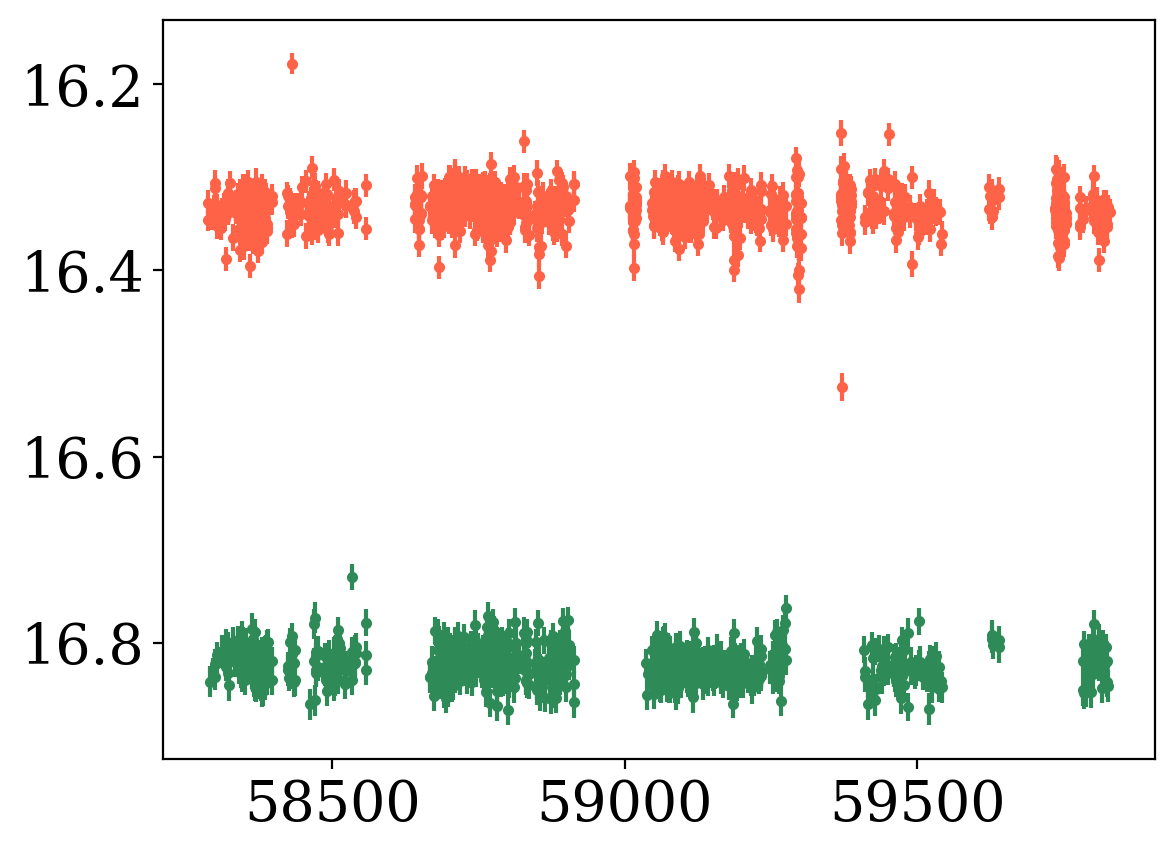

In [114]:
lc_r = fetch_lc(rnd, band='r')
lc_g = fetch_lc(rnd, band='g')
plt.errorbar(*lc_r, fmt='.', color='tomato')
plt.errorbar(*lc_g, fmt='.', color='seagreen')
plt.ylim(plt.ylim()[::-1])